<a href="https://colab.research.google.com/github/DS3001/group7/blob/EDA/Lab1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Project Concept + Dataset Creation**

**Research Question:**

*What socioeconomic factors are most influential on family income?*

**Response Variable:**

"coninc" (Family Income in Constant Dollars) [quantitative]

**Explanatory Variables:**

"race" (Race) [categorical]

- Levels: White, Black, Other

- To Consider: How do average family incomes differ across various racial and ethnic groups?


"hompop" (Household Size) [quantitative]

- Range: 0 - 16

- To Consider: How does the number of members in a household correlate with family income?


"degree" (highest level of education) [categorical]

- Levels: < High School, High School, Associate/Juniors College, Bacherlor's, Graduate

- To Consider: Is there a correlation between higher education levels and increased family income?


"health" (condition of health) [categorical]

- Levels: Excellent, Good, Fair, Poor

- To Consider: Are individuals with "Excellent" or "Good" health more likely to have higher family incomes compared to those with "Fair" or "Poor" health?


"hrs1" (number of hours worked last week) [quantitative]

- Range: 1 - 89

- To Consider: How do the hours worked per week influence family income across different household types?


"news" (how often read newspaper) [categorical]

- Levels: Few times a week, once a week, less than once a week, never

- To Consider: Does reading the news more frequently influence higher family income?

"earnrs" (how many family earned money) [quantitative]

- Range: 0 - 8

- To Consider: How does the number of earners in a household correlate with the overall household income?

**Other Variables:**

"year" (year surveyed) [quantitative]

- Range: 1972 - 2022

- Used as a filter variable





In [4]:
#Read in csv and filter to only contain response and explanatory variables and year
import pandas as pd
#
var_list = ['coninc', 'race', 'hompop', 'degree', 'health' ,'hrs1', 'news', 'earnrs', 'year'] # List of variables to save
output_file = 'raw_gss_data_url.csv' # Name of the file to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(37): # r each chunk of the data
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1+k) + '.csv' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_csv(url,low_memory=False) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode
    k =+ 1

https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
   Unnamed: 0  year  id            wrkstat  hrs1  hrs2 evwork    occ  \
0           1  1972   1  working full time   NaN   NaN    NaN  205.0   
1           2  1972   2            retired   NaN   NaN    yes  441.0   
2           3  1972   3  working part time   NaN   NaN    NaN  270.0   
3           4  1972   4  working full time   NaN   NaN    NaN    1.0   
4           5  1972   5      keeping house   NaN   NaN    yes  385.0   

   prestige        wrkslf  ...  instype02  instype03  instype04  \
0      50.0  someone else  ...        NaN        NaN        NaN   
1      45.0  someone else  ...        NaN        NaN        NaN   
2      44.0  someone else  ...        NaN        NaN        NaN   
3      57.0  someone else  ...        NaN        NaN        NaN   
4      40.0  someone else  ...        NaN        NaN        NaN   

   totalincentive  wtssps_nea  wtssnrps_nea  wtssps_next  wtssnrps_next  \
0             NaN         NaN       

In [5]:
import pandas as pd
#Read in csv
df = pd.read_csv('/content/raw_gss_data_url.csv')
df.head(10)

,coninc,race,hompop,degree,health,hrs1,news,earnrs,year
0,25926.0,white,1,bachelor's,good,NaN,every day,1.0,1972
1,33333.0,white,2,less than high school,fair,NaN,every day,0.0,1972
2,33333.0,white,4,high school,excellent,NaN,every day,2.0,1972
3,41667.0,white,2,bachelor's,good,NaN,once a week,2.0,1972
4,69444.0,white,2,high school,good,NaN,every day,1.0,1972
5,60185.0,white,1,high school,good,NaN,every day,1.0,1972
6,50926.0,white,1,high school,excellent,NaN,every day,1.0,1972
7,18519.0,white,1,bachelor's,good,NaN,every day,1.0,1972
8,3704.0,black,3,high school,excellent,NaN,less than once a week,1.0,1972
9,25926.0,black,7,high school,fair,NaN,every day,2.0,1972


# **Part 2: Dataset Cleaning**

**Summary of Decisions for Each Variable:**

"coninc" (Family Income in Constant Dollars)

- Missing Values: There were 7477 missing values that were all dropped. They can be excluded because GSS mentions that this variable was not recorded from 1972 - 1987, which is okay because we are worried about data from more recent years.

- Type: Converted to numeric because it is income expressed in constant dollars according to GSS

- Transform: Transformed using log in case it is better distributed

"race" (Race)

- Missing Values: There were 74 missing values that were all dropped. This is because it is possible that some people chose to leave this blank or inputting an incorrect option, which gives us a valid reason to drop these observations.

- Other Notes: white, black, and other are the only categories. It is worth noting that there is some class imbalance, so this should be taken into account during EDA

"degree" (highest level of education)

- Missing Values: There were 114 missing values that were all droped. The small number of missing samples gives us a valid reason to just drop the missing values, and GSS notes that there were some responses that had no answer, did not know/cannot choose, or skipped on web.

- Other Notes: There is also some class imbalance here to be noted.

"hompop" (Household Size)

- Missing Values: There were quite a few missing values (3459). GSS notes that quite a few of those were not availible in this release and that some also contained no answer. The only valid option here is to drop these values. Although sometimes imputation techniques can be used to fill in missing values or generate/predict values to replace the missing ones with, in this case it makes more sense to just drop this since the mean or median of household size would be less meaningful than a quantitative variable with a larger range.

- Type: Initially, the categories had some overlap (1 and 1.0) so to fix this, the type of this variable was converted to numeric to reduce the categories to the correct number of levels.

- Other Notes: There is also some class imbalance here to be noted.


"health" (condition of health)

- Missing Values: There were 15399 missing values. GSS notes that a lot of these observations are missing because many were inapplicable, no answer, do not know/cannot choose, or skipped on web. This makes sense because health can be a fairly personal topic, discouraging people from submitting responses to a survey. It also would not make sense to replace these values, so they were dropped. Even though this is a lot of the data, there is still a substantial number of observations that will provide enough data to come to conclusions regarding the response.

- Other Notes: There is also some class imbalance here to be noted.

"hrs1" (number of hours worked last week)

- Missing Values: There were 18869 missing values, and they were all dropped. GSS indicates that there were several missing responses due to inapplicable, no answer, do not know/cannot choose, and skipped on web. This makes sense because many people likely do not recall exactly how many hours they worked in a given week/feel comfortable reporting.

- Type: Converted to numeric because the unit of this variable is hours according to GSS

"news" (how often read newspaper)

- Missing Values: There were 12736 missing values, and they were all dropped. GSS indicates that there were several missing responses due to inapplicable, no answer, do not know/cannot choose, and skipped on web. Additionally, there is not a lot of data from before 1985, which is okay because we are concerned with data from more recent dates

"earnrs" (how many family earned money)

- Missing Values: There were only 56 missing values that were dropped. GSS notes that there are some missing values due to them being inapplicable, no answer, or skipped on web.

- Type: Converted to numeric because the unit of this variable is people according to GSS

"year" (year surveyed)

- Type: Converted to numeric for filtering.

- Filter: Filtered dataframe to include data that is greater than given year, x


In [6]:
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72426 entries, 0 to 72425
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   coninc  64949 non-null  object
 1   race    72319 non-null  object
 2   hompop  68388 non-null  object
 3   degree  72230 non-null  object
 4   health  55190 non-null  object
 5   hrs1    41596 non-null  object
 6   news    45905 non-null  object
 7   earnrs  71647 non-null  object
 8   year    72426 non-null  object
dtypes: object(9)
memory usage: 5.0+ MB


In [7]:
#Clean "coninc" - response variable
print(df['coninc'])

#Find the number of missing values
num_null = df['coninc'].isnull().sum()

print(f'There are {num_null} missing values before dropping')

#Drop missing values from columnn
df = df.dropna(subset = ['coninc'])

#Find the number of missing values after they are dropped to confirm
num_null = df['coninc'].isnull().sum()

print(f'There are {num_null} missing values after dropping')

#Drop values that are equal to 'coninc - some values were equal to 'coninc'
df = df[df['coninc'] != 'coninc']

#Convert the type to numeric because this is a number in dollars
df['coninc'] = pd.to_numeric(df['coninc'])

#Transform response with log in case it is better distributed than the untransformed response
df['coninc_log'] = np.log(df['coninc'])

0         25926.0
1         33333.0
2         33333.0
3         41667.0
4         69444.0
           ...   
72421     18480.0
72422     45360.0
72423     94080.0
72424    107520.0
72425     67200.0
Name: coninc, Length: 72426, dtype: object
There are 7477 missing values before dropping
There are 0 missing values after dropping


In [8]:
#Clean "race" variable - categorical explanatory variable
print(df['race'])

#Find the number of missing values
num_null = df['race'].isnull().sum()

print(f'There are {num_null} missing values before dropping')

#Drop missing values from columnn
df = df.dropna(subset = ['race'])

#Find the number of missing values after they are dropped to confirm
num_null = df['race'].isnull().sum()

print(f'There are {num_null} missing values after dropping')

print(df['race'].value_counts())

0        white
1        white
2        white
3        white
4        white
         ...  
72421    white
72422    white
72423    white
72424    white
72425    white
Name: race, Length: 64913, dtype: object
There are 74 missing values before dropping
There are 0 missing values after dropping
white    52039
black     8975
other     3825
Name: race, dtype: int64


In [9]:
#Clean "degree" variable - categorical explanatory variable
print(df['degree'])

#Find the number of missing values
num_null = df['degree'].isnull().sum()

print(f'There are {num_null} missing values')

#Drop missing values from columnn
df = df.dropna(subset = ['degree'])

#Find the number of missing values after they are dropped to confirm
num_null = df['degree'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['degree'].value_counts())

0                      bachelor's
1           less than high school
2                     high school
3                      bachelor's
4                     high school
                   ...           
72421                 high school
72422                    graduate
72423    associate/junior college
72424                    graduate
72425                    graduate
Name: degree, Length: 64839, dtype: object
There are 114 missing values
There are 0 missing values
high school                 32688
less than high school       12246
bachelor's                  10333
graduate                     5483
associate/junior college     3975
Name: degree, dtype: int64


In [10]:
#Clean "hompop" variable - quantitative explanatory variable
print(df['hompop'])

#Find the number of missing values
num_null = df['hompop'].isnull().sum()

print(f'There are {num_null} missing values')

#Drop missing values from columnn
df = df.dropna(subset = ['hompop'])

#Find the number of missing values after they are dropped to confirm
num_null = df['hompop'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['hompop'].unique())

#convert to numeric
df['hompop'] = pd.to_numeric(df['hompop'])

print(df['hompop'].unique())

0        1
1        2
2        4
3        2
4        2
        ..
72421    0
72422    0
72423    0
72424    0
72425    0
Name: hompop, Length: 64725, dtype: object
There are 3459 missing values
There are 0 missing values
['1' '2' '4' '3' '7' '5' '6' '11' '9' '8' '10' '14' '15' '2.0' '4.0' '3.0'
 '5.0' '8.0' '7.0' '1.0' '6.0' '9.0' '10.0' '11.0' '13.0' '12.0' '16.0'
 '12' '0.0' '0']
[ 1.  2.  4.  3.  7.  5.  6. 11.  9.  8. 10. 14. 15. 13. 12. 16.  0.]


In [11]:
#Clean "health" variable - categorical explanatory variable
print(df['health'])

# #Find the number of missing values
num_null = df['health'].isnull().sum()

print(f'There are {num_null} missing values')

# #Drop missing values from columnn
df = df.dropna(subset = ['health'])

# #Find the number of missing values after they are dropped to confirm
num_null = df['health'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['health'].value_counts())

0             good
1             fair
2        excellent
3             good
4             good
           ...    
72421         good
72422         good
72423         good
72424         good
72425         fair
Name: health, Length: 61266, dtype: object
There are 15399 missing values
There are 0 missing values
good         21028
excellent    13542
fair          8799
poor          2498
Name: health, dtype: int64


In [12]:
#Clean "hrs1" variable - quantitative explanatory variable
print(df['hrs1'])

# # #Find the number of missing values
num_null = df['hrs1'].isnull().sum()

print(f'There are {num_null} missing values')

# # #Drop missing values from columnn
df = df.dropna(subset = ['hrs1'])

# #Find the number of missing values after they are dropped to confirm
num_null = df['hrs1'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['hrs1'].unique())

#convert to numeric
df['hrs1'] = pd.to_numeric(df['hrs1'])

print(df['hrs1'].unique())

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
72421    48.0
72422    50.0
72423    38.0
72424    40.0
72425    40.0
Name: hrs1, Length: 45867, dtype: object
There are 18869 missing values
There are 0 missing values
['27.0' '40.0' '52.0' '35.0' '45.0' '70.0' '60.0' '42.0' '23.0' '55.0'
 '50.0' '6.0' '37.0' '36.0' '48.0' '16.0' '24.0' '20.0' '80.0' '65.0'
 '15.0' '39.0' '25.0' '22.0' '44.0' '26.0' '38.0' '12.0' '84.0' '54.0'
 '32.0' '3.0' '51.0' '30.0' '89.0' '43.0' '18.0' '58.0' '28.0' '46.0'
 '8.0' '9.0' '19.0' '14.0' '66.0' '61.0' '49.0' '10.0' '72.0' '34.0'
 '75.0' '53.0' '7.0' '21.0' '47.0' '57.0' '71.0' '13.0' '5.0' '31.0'
 '41.0' '17.0' '56.0' '4.0' '0.0' '33.0' '1.0' '68.0' '29.0' '11.0' '2.0'
 '85.0' '62.0' '59.0' '78.0' '77.0' '64.0' '63.0' '67.0' '73.0' '74.0'
 '69.0' '76.0' '79.0' '86.0' '87.0' '83.0' '88.0' '82.0' '81.0']
[27. 40. 52. 35. 45. 70. 60. 42. 23. 55. 50.  6. 37. 36. 48. 16. 24. 20.
 80. 65. 15. 39. 25. 22. 44. 26. 38. 12. 84.

In [13]:
#Clean "news" variable - categorical explanatory variable
print(df['news'].info())

# # #Find the number of missing values
num_null = df['news'].isnull().sum()

print(f'There are {num_null} missing values')

# # # #Drop missing values from columnn
df = df.dropna(subset = ['news'])

# # #Find the number of missing values after they are dropped to confirm
num_null = df['news'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['news'].value_counts())

<class 'pandas.core.series.Series'>
Int64Index: 26998 entries, 1613 to 72425
Series name: news
Non-Null Count  Dtype 
--------------  ----- 
14262 non-null  object
dtypes: object(1)
memory usage: 421.8+ KB
None
There are 12736 missing values
There are 0 missing values
every day                5690
a few times a week       3280
once a week              1884
never                    1825
less than once a week    1583
Name: news, dtype: int64


In [14]:
#Clean "earnrs" variable - quantitative explanatory variable
print(df['earnrs'].info())

# #Find the number of missing values
num_null = df['earnrs'].isnull().sum()

print(f'There are {num_null} missing values')

# # # # #Drop missing values from columnn
df = df.dropna(subset = ['earnrs'])

# # # #Find the number of missing values after they are dropped to confirm
num_null = df['earnrs'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['earnrs'].unique())

#convert to numeric
df['earnrs'] = pd.to_numeric(df['earnrs'])

print(df['earnrs'].unique())

<class 'pandas.core.series.Series'>
Int64Index: 14262 entries, 4605 to 72425
Series name: earnrs
Non-Null Count  Dtype 
--------------  ----- 
14206 non-null  object
dtypes: object(1)
memory usage: 222.8+ KB
None
There are 56 missing values
There are 0 missing values
['1.0' '2.0' '3.0' '4.0' '6.0' '5.0' '0.0' '8.0' '7.0']
[1. 2. 3. 4. 6. 5. 0. 8. 7.]


<ipython-input-14-e2b4d10096ce>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earnrs'] = pd.to_numeric(df['earnrs'])


In [15]:
#Filter dataframe by year - decide on a filter

df['year'].value_counts()

df['year'] = pd.to_numeric(df['year'])

desired_year = 2000

filtered_df = df[df['year'] >= desired_year]
filtered_df.reset_index(drop=True, inplace=True)

print(filtered_df.head(5))

filtered_df.isnull().sum()

filtered_df.info()


     coninc   race  hompop                 degree     health  hrs1  \
0   28418.0  white     1.0            high school       good  55.0   
1  166419.0  white     4.0               graduate  excellent  50.0   
2   56836.0  white     3.0            high school       good  45.0   
3   14209.0  white     3.0  less than high school       good  50.0   
4  166419.0  white     3.0             bachelor's  excellent  40.0   

                 news  earnrs  year  coninc_log  
0  a few times a week     1.0  2000   10.254778  
1  a few times a week     2.0  2000   12.022264  
2  a few times a week     3.0  2000   10.947925  
3  a few times a week     1.0  2000    9.561631  
4  a few times a week     2.0  2000   12.022264  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coninc      5824 non-null   float64
 1   race        5824 non-null   object 
 2   hom

<ipython-input-15-344ea0daca66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'])


In [16]:
#Rename Columns
filtered_df = filtered_df.rename(columns = {'coninc': 'FamilyIncome', 'degree': 'Degree', 'hompop':'HouseholdPopulation', 'race': 'Race', 'year': 'Year', 'coninc_log':'FamilyIncomeLog', 'news':'News', 'earnrs':'NumberOfEarners', 'hrs1':'HoursWorkedLastWeek', 'health':'Health'})

print(filtered_df.head(10))

   FamilyIncome   Race  HouseholdPopulation                 Degree     Health  \
0       28418.0  white                  1.0            high school       good   
1      166419.0  white                  4.0               graduate  excellent   
2       56836.0  white                  3.0            high school       good   
3       14209.0  white                  3.0  less than high school       good   
4      166419.0  white                  3.0             bachelor's  excellent   
5       21959.0  white                  1.0            high school       fair   
6       69753.0  white                  1.0             bachelor's       good   
7       38752.0  white                  2.0             bachelor's       fair   
8      166419.0  white                  2.0             bachelor's  excellent   
9      166419.0  white                  3.0             bachelor's  excellent   

   HoursWorkedLastWeek                   News  NumberOfEarners  Year  \
0                 55.0     a few tim

# **Part 3.1: EDA & Visualizations for Univariate Analysis**

**Summary of EDA and Visualizations:**

"coninc" (Family Income in Constant Dollars)

- Histograms: The first histogram is not normally distributed at all. The histogram of LogFamilyIncome is much better, which could mean that using LogFamilyIncome might make more sense. It is important to note that the histogram of LogFamilyIncome is left skewed with low outliers. These outliers might be worth keeping, however, because there appears to be a good amount and they make sense in this data

- Statistics:
  - mean   =   57142.827831
  - std    =   44162.535600
  - min    =     336.000000
  - 25%    =   24543.000000
  - 50%    =   45360.000000
  - 75%    =   72774.000000
  - max    =  178712.464940

- Statistics Explained

  - The median is a better measure of the center here because of the histogram is skewed and has outliers
  - The mean family income is 57,142 dollars, with a min of 336 dollars and a max of 178,712 dollars
  - The quantiles mean that the 25th percentile family income is 24,543 dollars, the 50th percentile is 45,360 dollars, and the 75th percentile is 72,774 dollars.

- Boxplot: The boxplot shows that there are a lot of high outliers because of income disparity and a much smaller upperclass with salaries that are many standard deviations higher than the mean

- Outliers: The presence of high outliers is due to income disparity.

- Kernel Density: This also shows the the presence of high outliers.


"race" (Race)

- Frequency: The most frequent race interviewed was white by a large margin.

"hompop" (Household Size)

- Histogram: The histogram is very right skewed, meaning that larger household sizes are much less frequent at higher numbers. It is also unimodal.

- Statistics:
  - mean     =   2.052026
  - std      =   1.616251
  - min      =   0.000000
  - 25%      =   1.000000
  - 50%      =   2.000000
  - 75%      =   3.000000
  - max      =  11.000000
- Statisitics Explained:
  - The median is a better measure of the center here because of the histogram is skewed and has outliers
  - The mean household size is 2 people, with a min of 0 and a max of 11 people.
  - The quantiles mean that the 25th percentile household size is 1 person, the 50th percentile is 2 people, and the 75th percentile is 3 people.

"degree" (highest level of education)

- Frequency: The most frequent degree reported was high school, and the least common was less than high school, indicating that most of the population from this data at least graduated highschool.

"health" (condition of health)

- Frequency: The most frequent health levels are excellent and good health. Fair and poor health are much lower.

"hrs1" (number of hours worked last week)

- Histogram: The histogram is very symmetrical and is unimodal with minimal skew.
- Statistics
  - mean   =    41.901614
  - std    =    14.095176
  - min    =     0.000000
  - 25%    =    38.000000
  - 50%    =    40.000000
  - 75%    =    50.000000
  - max    =    89.000000

- Statisitics Explained:
  - The mean is a better measure of the center here because of the histogram is not skewed and is symmetric.
  - The mean hours worked last week is 42 hours, the max is 90 hours, and the min is 0 hours.
  - The quantiles mean that the 25th percentile hours worked last week is 38 hours, the 50th percentile hours worked is 40, and the 75th percentile is 50 hours.
  - There is a significant amount of variance, which is also attributed to the income disparity in this data

"news" (how often read newspaper)

- Frequency: Most people in the population of this data either every day or never, making this a very divisive question. The other categories are roughly equal, meaning there is low variance in this data.

"earnrs" (how many family earned money)

- Histogram: The histogram is very symmetrical and is unimodal with minimal skew.
- Statistics
  - mean        1.711882
  - std         0.880118
  - min         0.000000
  - 25%         1.000000
  - 50%         2.000000
  - 75%         2.000000
  - max         8.000000

- Outliers: There are some high outliers, which makes sense because it would not be super common for families to have more than a couple standard deviations from the mean number of household earners.

- Statisitics Explained:
  - The median is a better measure of the center here because of the histogram is skewed and is not symmetric.
  - The mean number of earners is 2, the max is 8, and the min is 0.
  - The quantiles mean that the 25th percentile earners is 1, the 50th percent is 2, and the 75th percent is 2.

<Axes: >

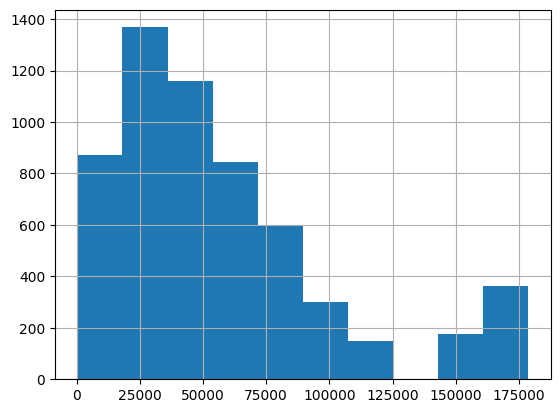

In [17]:
#Response Variable EDA

filtered_df['FamilyIncome'].hist()

<Axes: >

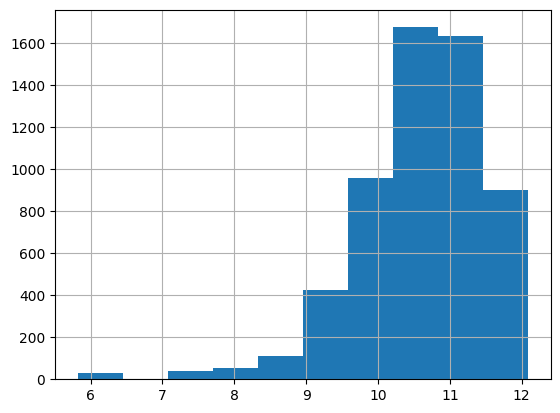

In [18]:
#Histogram for Log of FamilyIncome

filtered_df['FamilyIncomeLog'].hist()


In [26]:
#FamilyIncome summary statistics

print(filtered_df['FamilyIncome'].describe())

print(filtered_df['FamilyIncomeLog'].describe())

print(filtered_df['FamilyIncome'].var())


count      5824.000000
mean      57142.827831
std       44162.535600
min         336.000000
25%       24543.000000
50%       45360.000000
75%       72774.000000
max      178712.464940
Name: FamilyIncome, dtype: float64
count    5824.000000
mean       10.620011
std         0.925695
min         5.817111
25%        10.108182
50%        10.722386
75%        11.195114
max        12.093533
Name: FamilyIncomeLog, dtype: float64
1950329550.618595


<Axes: >

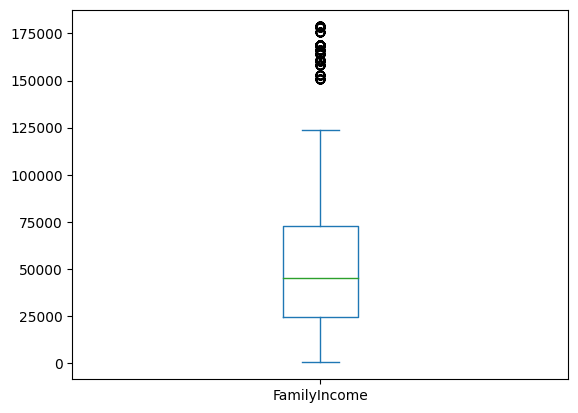

In [20]:
filtered_df['FamilyIncome'].plot.box()

<Axes: ylabel='Density'>

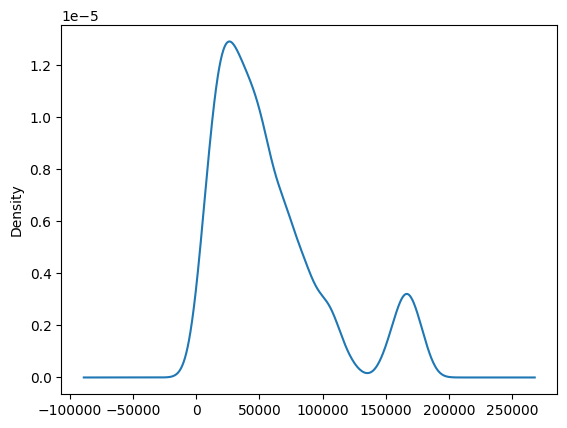

In [21]:
filtered_df['FamilyIncome'].plot.density()


Race
---------------
count      5824
unique        3
top       white
freq       4302
Name: Race, dtype: object


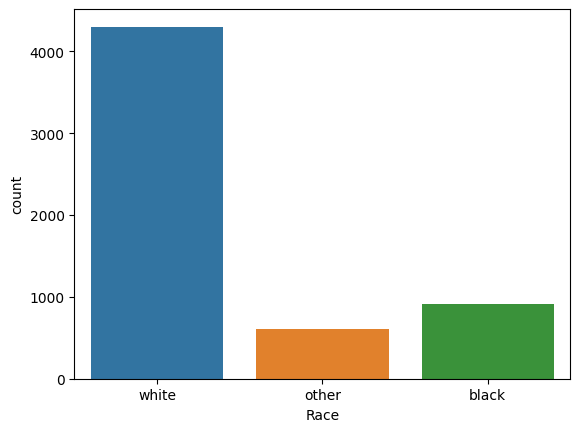


Degree
---------------
count            5824
unique              5
top       high school
freq             2887
Name: Degree, dtype: object


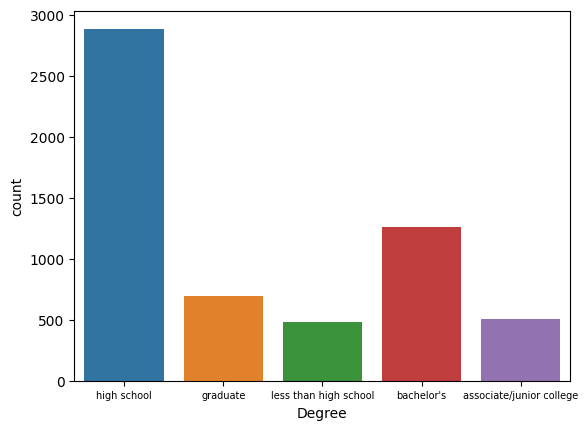


HouseholdPopulation
---------------
count    5824.000000
mean        2.052026
std         1.616251
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: HouseholdPopulation, dtype: float64


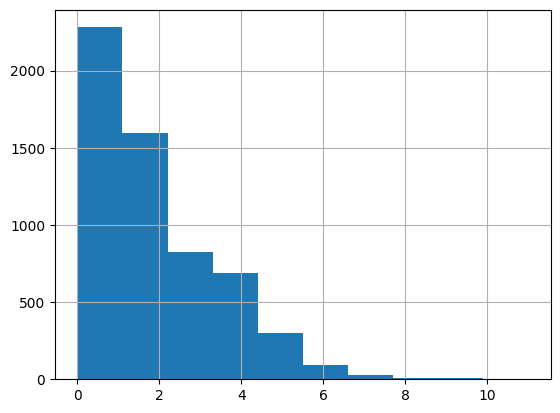


Health
---------------
count     5824
unique       4
top       good
freq      3034
Name: Health, dtype: object


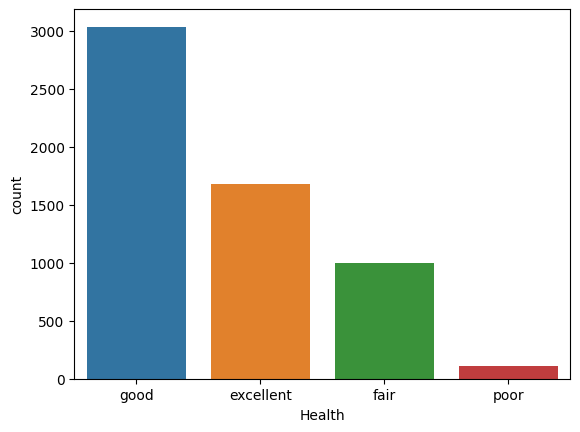


HoursWorkedLastWeek
---------------
count    5824.000000
mean       41.901614
std        14.095176
min         0.000000
25%        38.000000
50%        40.000000
75%        50.000000
max        89.000000
Name: HoursWorkedLastWeek, dtype: float64


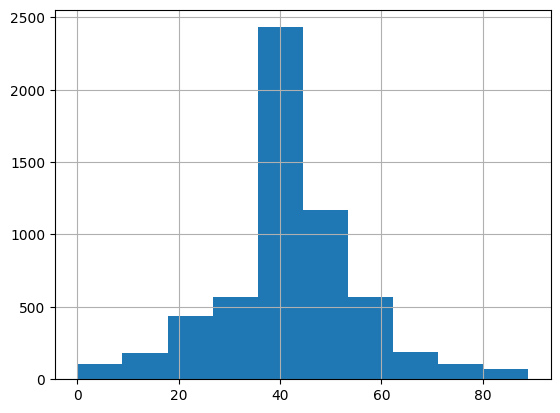


News
---------------
count      5824
unique        5
top       never
freq       1477
Name: News, dtype: object


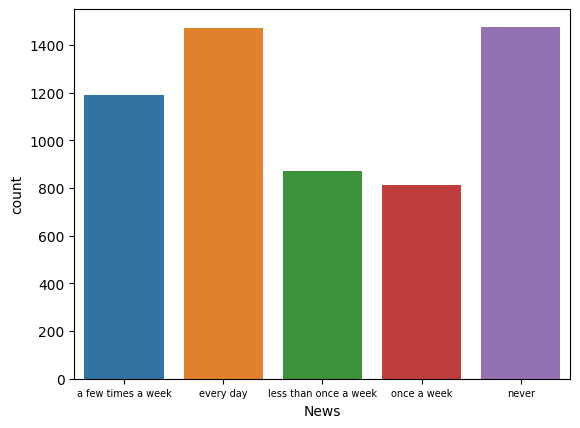


NumberOfEarners
---------------
count    5824.000000
mean        1.711882
std         0.880118
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: NumberOfEarners, dtype: float64


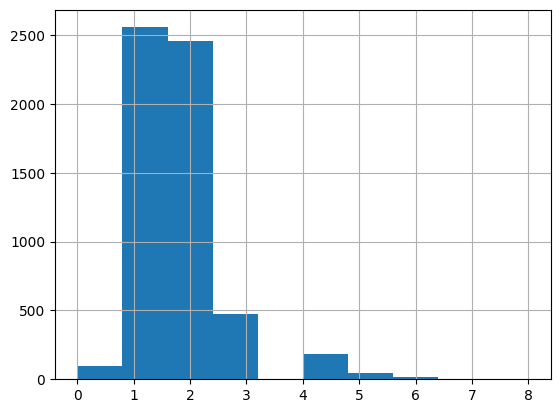

In [22]:
#Summary Statistics and EDA for explanatory variables
from matplotlib import pyplot as plt
import seaborn as sns

#Race
print("\nRace\n---------------")
print(filtered_df['Race'].describe())

sns.countplot(filtered_df, x = 'Race')
plt.show()

#Degree
print("\nDegree\n---------------")
print(filtered_df['Degree'].describe())

sns.countplot(filtered_df, x = 'Degree')
plt.xticks(fontsize=7)
plt.show()

#HouseholdPopulation
print("\nHouseholdPopulation\n---------------")
print(filtered_df['HouseholdPopulation'].describe())

filtered_df['HouseholdPopulation'].hist()
plt.show()

#Health
print("\nHealth\n---------------")
print(filtered_df['Health'].describe())

sns.countplot(filtered_df, x = 'Health')
plt.show()

#HoursWorkedLastWeek
print("\nHoursWorkedLastWeek\n---------------")
print(filtered_df['HoursWorkedLastWeek'].describe())

filtered_df['HoursWorkedLastWeek'].hist()
plt.show()

#News
print("\nNews\n---------------")
print(filtered_df['News'].describe())

sns.countplot(filtered_df, x = 'News')
plt.xticks(fontsize=7)
plt.show()

#NumberOfEarners
print("\nNumberOfEarners\n---------------")
print(filtered_df['NumberOfEarners'].describe())

filtered_df['NumberOfEarners'].hist()
plt.show()


# **Part 3.2: EDA & Visualizations for Bivariate Analysis**

**Relationships**

- **Quantitative vs. Response**

  - HomePopulation vs. FamilyIncome
    - Correlation: 0.049 - There is not a very strong correlation between Home Population and Family Income
    - Scatterplot: The scatterplot also is not indicative of a strong relationship.
  - NumberHoursWorkedLastWeek vs. FamilyIncome
    - Correlation: 0.142 - There is a slightly stronger correlation, but still nothing significant
    - Scatterplot: The scatterplot does not indicate a strong correlation.
  - NumberOfEarners vs. FamilyIncome
    - Correlation: 0.307 - There is a slight positive relationship (meaning that Family Income increases as the number of earners increases) but again, still nothing significant
    - Scatterplot: Does not indicate a very strong relationship.

- **Qualitative vs. Response**

  - Race vs. FamilyIncome
    - Violin Plot: It appears that there is no significant relationship between race and Family Income. White has a slightly larger family income, but it should be noted that there were significantly more people that reported that their race was white on the survey.
  - Degree vs. FamilyIncome
    - Violin Plot: Family income increases as the prestige of degree increases.
  - Health vs. FamilyIncome
    - Violin Plot: It appears that excellent and good health report higher family incomes than fair and poor health.
  - News vs. FamilyIncome
    - The results show that those who read the news more have higher family incomes, indicated by the increasing family incomes as the frequency of reading the news increases.




<ipython-input-23-b0bee1b6091e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(filtered_df.corr())
<ipython-input-23-b0bee1b6091e>:4: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(filtered_df.cov())


                     FamilyIncome  HouseholdPopulation  HoursWorkedLastWeek  \
FamilyIncome             1.000000             0.049137             0.142299   
HouseholdPopulation      0.049137             1.000000             0.005358   
HoursWorkedLastWeek      0.142299             0.005358             1.000000   
NumberOfEarners          0.307230             0.321290            -0.022635   
Year                     0.056156            -0.472151            -0.047627   
FamilyIncomeLog          0.846270             0.049789             0.184478   

                     NumberOfEarners      Year  FamilyIncomeLog  
FamilyIncome                0.307230  0.056156         0.846270  
HouseholdPopulation         0.321290 -0.472151         0.049789  
HoursWorkedLastWeek        -0.022635 -0.047627         0.184478  
NumberOfEarners             1.000000  0.004954         0.315653  
Year                        0.004954  1.000000         0.037724  
FamilyIncomeLog             0.315653  0.037724    

<Axes: xlabel='NumberOfEarners', ylabel='FamilyIncome'>

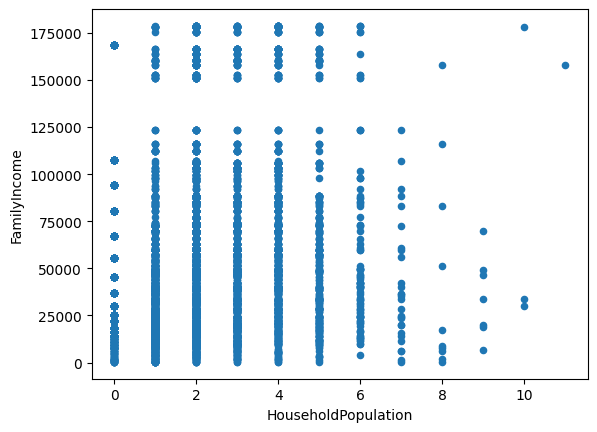

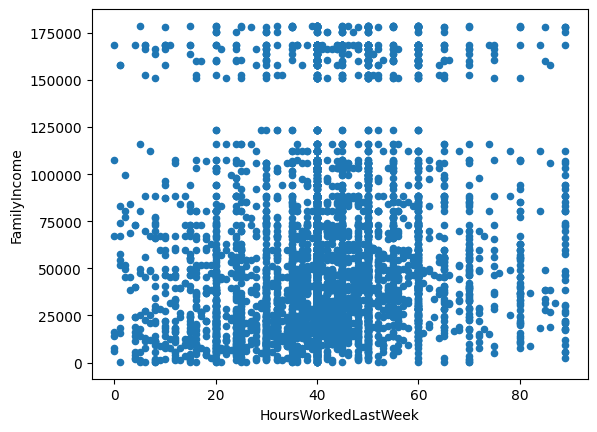

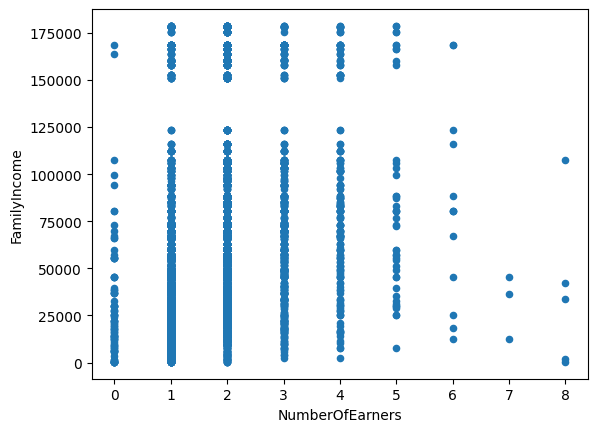

In [23]:
#Correlation Coefficients for Quant vs. Response

print(filtered_df.corr())
print(filtered_df.cov())

#Scatterplots

filtered_df.plot.scatter(y = 'FamilyIncome', x = 'HouseholdPopulation')
filtered_df.plot.scatter(y = 'FamilyIncome', x = 'HoursWorkedLastWeek')
filtered_df.plot.scatter(y = 'FamilyIncome', x = 'NumberOfEarners')

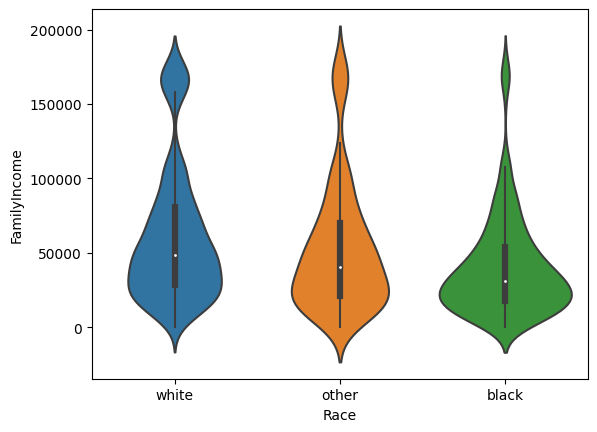

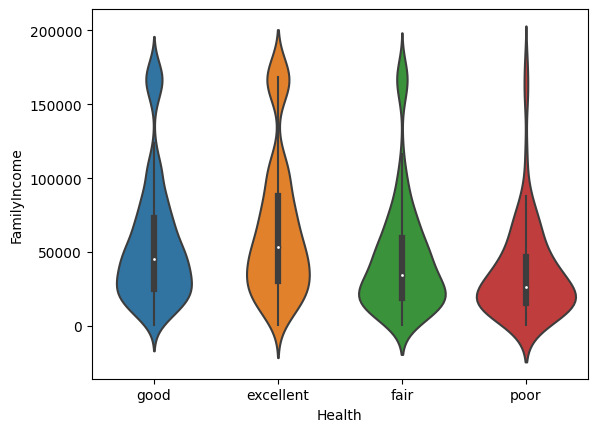

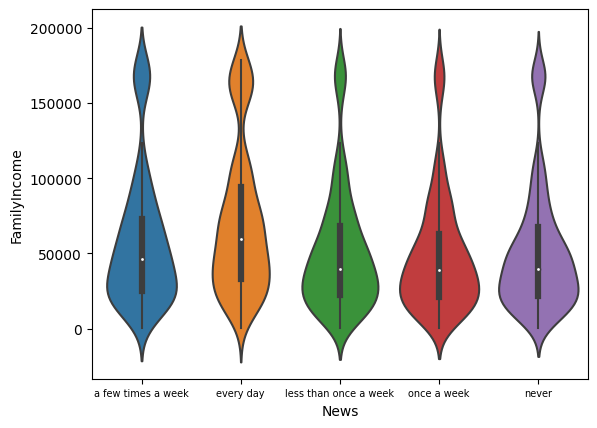

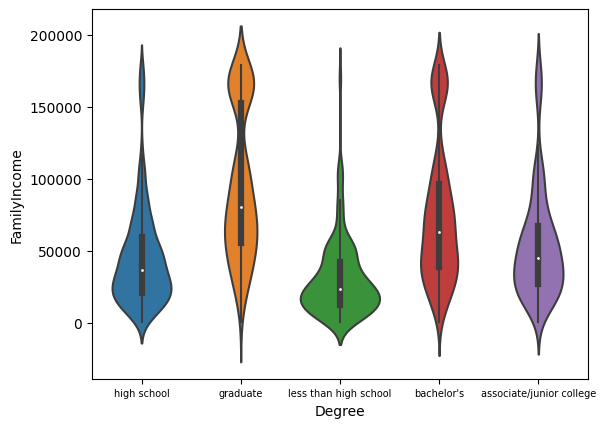

In [24]:
#Qual vs. Response
sns.violinplot(filtered_df, x = "Race", y = "FamilyIncome")
plt.show()
sns.violinplot(filtered_df, x = "Health", y = "FamilyIncome")
plt.show()
sns.violinplot(filtered_df, x = "News", y = "FamilyIncome")
plt.xticks(fontsize=7)
plt.show()
sns.violinplot(filtered_df, x = "Degree", y = "FamilyIncome")
plt.xticks(fontsize=7)
plt.show()


# **Part 4: Analysis & Conclusions**




